# LSTM Model to predict average lead price for next 5 months

## Instructions for running:

### In the 'input_data.csv' file, enter the average lead prices and USD/INR Exchange Rate values for the last 10 months in the consecutive columns. Then run all the cells below. <br>
   

In [37]:
from tensorflow.keras.models import load_model
model=load_model('model.h5')
import numpy as np
import pandas as pd
df=pd.read_csv('input_data.csv')
print(df) #Reading CSV file

    Lead Price  USD/INR Exchange Rate
0  1935.842196              74.744413
1  1878.680372              73.584960
2  1773.961685              73.562340
3  1918.888424              74.279537
4  2001.907066              73.719248
5  2012.419036              73.138439
6  2089.104842              72.791140
7  1954.569200              72.801716
8  1997.856000              74.454233
9  2188.551802              73.582459


In [38]:
lead_unscaled=df['Lead Price'].tolist()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(df)
data_scaled = scaler.transform(df)
data_scaled=data_scaled.reshape(1,data_scaled.shape[0],data_scaled.shape[1]) #(samples,past days, number of features)
forecast = model.predict(data_scaled) #forecast 
element=forecast[0]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 2, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
#extracting required column from 2 repeated columns
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)

## Prediction:

In [36]:
print("Predicted values for next 5 months:",y_pred) #predictions on first test example

Predicted values for next 5 months: [2103.0337 2074.9592 2027.3541 2002.2565 1997.8081]


## Plot of prediction:

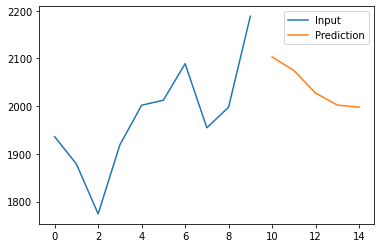

In [39]:
#Plotting input and prediction

from matplotlib import pyplot as plt

x_axis=np.array([])
for i in range(15):
  x_axis=np.append(x_axis, i)

plt.plot(x_axis[0:10],lead_unscaled)
plt.plot(x_axis[10:15],y_pred)
plt.legend(["Input","Prediction"])
plt.show()